In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

C:\Users\Pratik\.conda\envs\py310\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1366 - accuracy: 0.9590 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0344 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9917

Test Accuracy: 0.9917


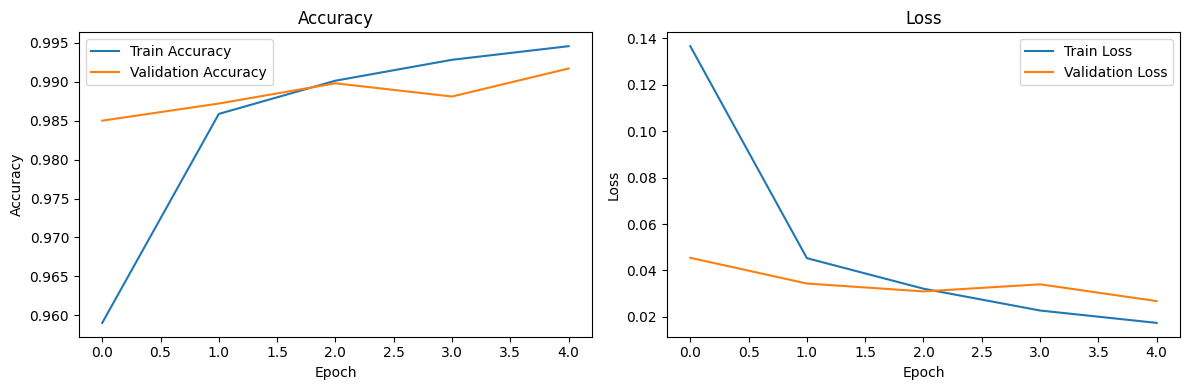

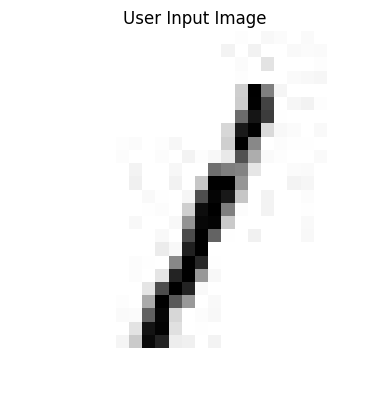

1/1 [==============================] - 0s 260ms/step
Model Prediction for digit_sample1.jpg: 1


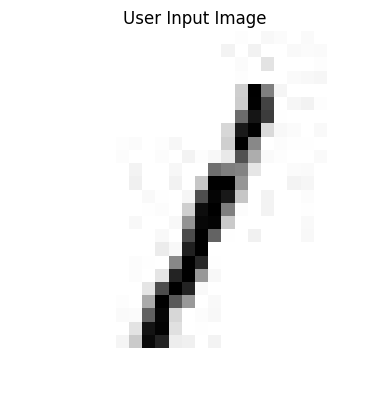

1/1 [==============================] - 0s 21ms/step
Model Prediction for digit_sample2.jpg: 1


In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for Conv2D input: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction on custom images
for i in range(1, 3):
    # Load user image
    img_path = f'MNIST1.jpg'  # Use your own image file here
    img = Image.open(img_path).convert('L')  # Convert to grayscale

    # Resize to 28x28 pixels (like MNIST)
    img = img.resize((28, 28))

    # Convert image to numpy array and invert it (if needed)
    img = np.array(img)
    img = 255 - img  # Invert if background is white

    # Normalize and reshape
    img = img / 255.0
    img_input = img.reshape(1, 28, 28, 1)

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("User Input Image")
    plt.axis('off')
    plt.show()

    # Predict using the model
    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    print(f"Model Prediction for digit_sample{i}.jpg: {predicted_class}")
